# KMeans
(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')

* <font color=red>n_clusters </font> :  int, optional, default: 8  
聚类数
* <font color=red>init</font>: {'k-means++', 'random' or an ndarray}  
采用k-means++(一种生成初始质心的算法)kmeans++：种子点选取的第二种方法。kmedoids(PAM,Partitioning Around Medoids)
* <font color=red>n_init</font>: int, default: 10  
每一次算法运行时开始的centroid seeds是随机生成的, 这样得到的结果也可能有好有坏. 所以要运行算法n_init次, 取其中最好的。
* <font color=red>max_iter</font>: int, default: 300  
每次迭代的最大次数
* <font color=red>tol</font>: float, default: 1e-4  
容忍的最小误差，当误差小于tol就会退出迭代（算法中会依赖数据本身）
* <font color=red>precompute_distances</font>: {'auto', True, False}  
这个参数会在空间和时间之间做权衡，如果是True 会把整个距离矩阵都放到内存中，auto 会默认在数据样大于featurs*samples 的数量大于12e6 的时候False,False时核心实现的方法是利用Cpython 来实现的
* <font color=red>verbose</font>: int, default 0  
默认值：False，是否输出详细信息，类型：布尔型（True，False）
* <font color=red>random_state</font>: int  
随机生成器的种子 ，和初始化中心有关
* <font color=red>copy_x</font>: boolean, default True
* <font color=red>n_jobs</font>: int  
使用进程的数量
* <font color=red>algorithm</font>: "auto", "full" or "elkan", default="auto"  
elkan更有效利用三角形不等式，"auto"是选择"elkan"，elkan=密集数据，full=稀疏数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 官网案例

Text(0.5,1,'Unevenly Sized Blobs')

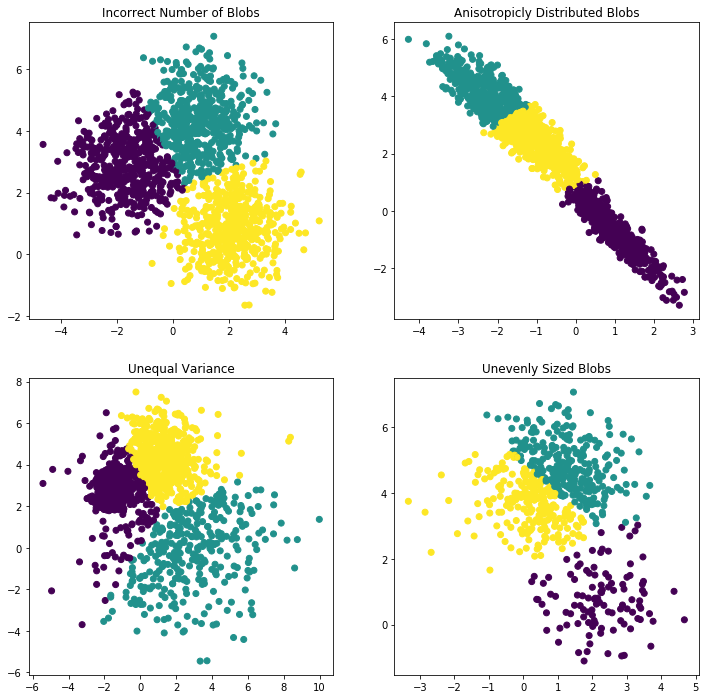

In [2]:
#生成随机数据  随机种子为0，默认3类别
n_samples = 1500
random_state = 0
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
#构建画图窗口
plt.figure(figsize=(12, 12))
#错误的聚类数目
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

#各向异性分布的数据 经过乘积后的数据分布
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# 不同的方差数据
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# 不均衡的数据
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

# 实际举例

In [2]:
data = [['Budweiser', 144, 15, 4.7, 0.43],
 ['Schlitz', 151, 19, 4.9, 0.43],
 ['Lowenbrau', 157, 15, 0.9, 0.48],
 ['Kronenbourg', 170, 7, 5.2, 0.73],
 ['Heineken', 152, 11, 5.0, 0.77],
 ['Old_Milwaukee', 145, 23, 4.6, 0.28],
 ['Augsberger', 175, 24, 5.5, 0.4],
 ['Srohs_Bohemian_Style', 149, 27, 4.7, 0.42],
 ['Miller_Lite', 99, 10, 4.3, 0.43],
 ['Budweiser_Light', 113, 8, 3.7, 0.4],
 ['Coors', 140, 18, 4.6, 0.44],
 ['Coors_Light', 102, 15, 4.1, 0.46],
 ['Michelob_Light', 135, 11, 4.2, 0.5],
 ['Becks', 150, 19, 4.7, 0.76],
 ['Kirin', 149, 6, 5.0, 0.79],
 ['Pabst_Extra_Light', 68, 15, 2.3, 0.38],
 ['Hamms', 139, 19, 4.4, 0.43],
 ['Heilemans_Old_Style', 144, 24, 4.9, 0.43],
 ['Olympia_Goled_Light', 72, 6, 2.9, 0.46],
 ['Schlitz_Light', 97, 7, 4.2, 0.47]]

In [9]:
import pandas as pd
df = pd.DataFrame(data,columns=["name","calories","sodium","alcohol","cost"])
X = df[["calories","sodium","alcohol","cost"]]
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [10]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
km3 = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)
#进行StandardScaler数据处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
km_scaler = KMeans(n_clusters=3).fit(X_scaled)

In [11]:
df['cluster2'] = km2.labels_
df['cluster3'] = km3.labels_
df["scaled_cluster"] = km_scaler.labels_
df

,name,calories,sodium,alcohol,cost,cluster2,cluster3,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,0,1
1,Schlitz,151,19,4.9,0.43,0,0,1
2,Lowenbrau,157,15,0.9,0.48,0,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0,2
4,Heineken,152,11,5.0,0.77,0,0,2
5,Old_Milwaukee,145,23,4.6,0.28,0,0,1
6,Augsberger,175,24,5.5,0.40,0,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,1
8,Miller_Lite,99,10,4.3,0.43,1,2,0
9,Budweiser_Light,113,8,3.7,0.40,1,2,0


In [12]:
from pandas.tools.plotting import scatter_matrix
#聚类中心
cluster_centers_2 = km2.cluster_centers_
cluster_centers_3 = km3.cluster_centers_
cluster_centers_scaler=km_scaler.cluster_centers_
print(df.groupby("cluster2").mean())
print("-----------------------------")
print(df.groupby("cluster3").mean())
print("-----------------------------")
print(df.groupby("scaled_cluster").mean())

            calories     sodium   alcohol      cost  cluster3  scaled_cluster
cluster2                                                                     
0         150.000000  17.000000  4.521429  0.520714  0.000000        1.142857
1          91.833333  10.166667  3.583333  0.433333  1.666667        0.000000
-----------------------------
          calories  sodium   alcohol      cost  cluster2  scaled_cluster
cluster3                                                                
0           150.00    17.0  4.521429  0.520714       0.0        1.142857
1            70.00    10.5  2.600000  0.420000       1.0        0.000000
2           102.75    10.0  4.075000  0.440000       1.0        0.000000
-----------------------------
                calories  sodium  alcohol    cost  cluster2  cluster3
scaled_cluster                                                       
0                105.375  10.875   3.3250  0.4475      0.75      1.25
1                148.375  21.125   4.7875  0.4075    

Text(0,0.5,'Alcohol')

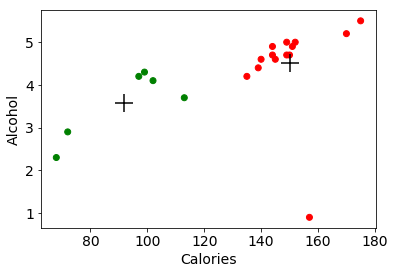

In [13]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

centers_2 = df.groupby("cluster2").mean().reset_index()
centers_3 = df.groupby("cluster3").mean().reset_index()
centers_scaled = df.groupby("scaled_cluster").mean().reset_index()

plt.scatter(df["calories"], df["alcohol"],c=colors[df["cluster2"]])
plt.scatter(centers_2.calories, centers_2.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("Calories")
plt.ylabel("Alcohol")

Text(0.5,0.98,'scaled_cluster')

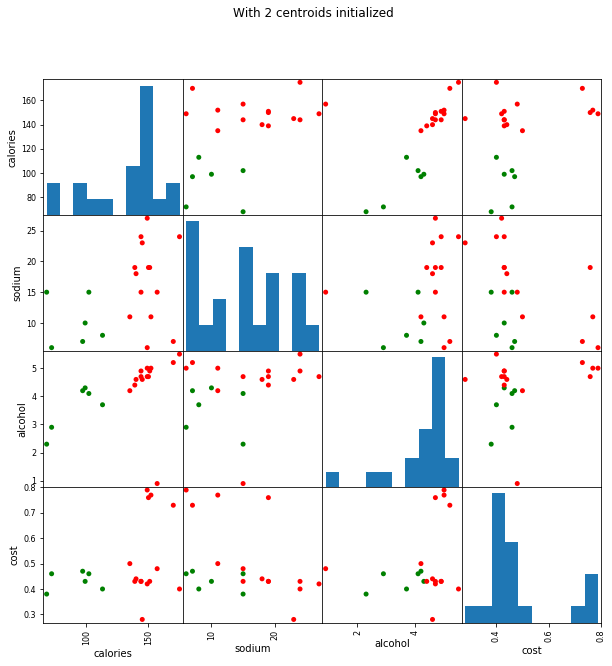

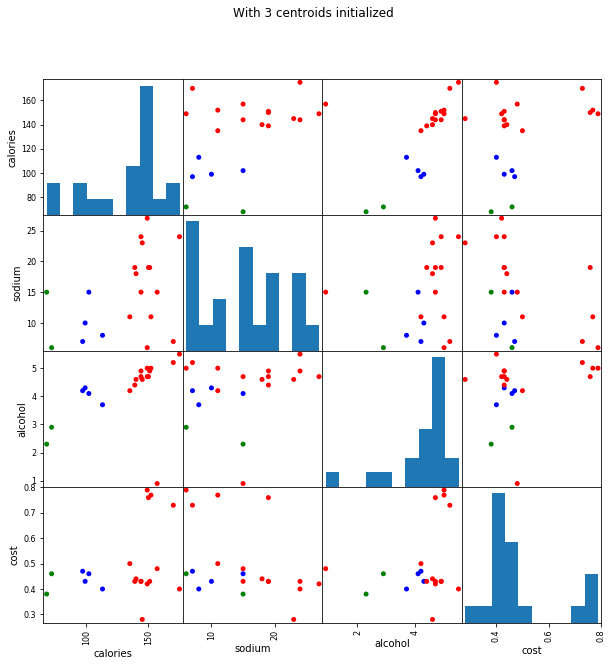

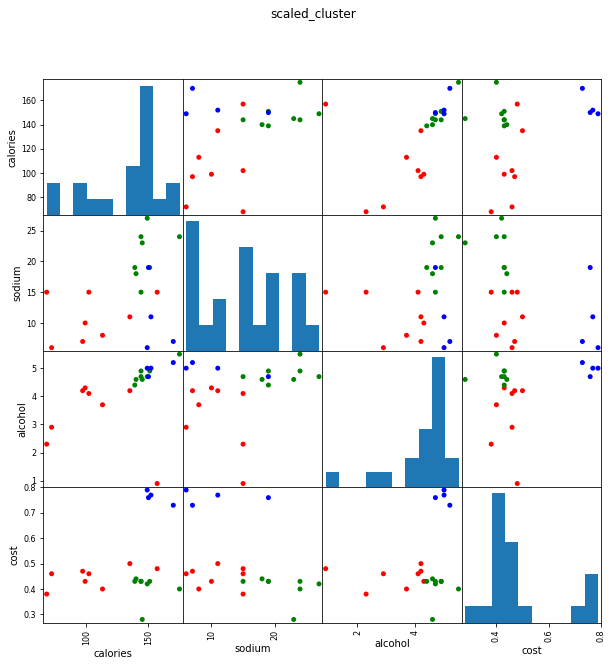

In [14]:
%matplotlib inline
scatter_matrix(df[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[df["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

scatter_matrix(df[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[df["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

pd.scatter_matrix(X, c=colors[df.scaled_cluster], alpha=1, figsize=(10,10), s=100)
plt.suptitle("scaled_cluster")